Important relations among different columns in the dataframe above:
    
#### These relations are analyzed regardless of the existing rate at the country level (everything will be examined globally)"
- distribution of suicide between different age range for males in different years 
- compare this distribution with that of women 
- how HDI (Human Development Index) can affect the suicide rate?

    `Make inference`

#### These relations are analyzed at the country level"

- which countries show more suicide rate among different genders?
    
    `Requires another CSV file to be downloaded`

- barplot for countries cmparing the rate between the youngest and oldest age range 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./master.csv')

print('The number of training examples before dropna: ', len(df))
df = df.dropna()
print('The number of training examples after dropna: ', len(df))
print('Total number of features: ', len(df.columns))
df.head()

The number of training examples before dropna:  27820
The number of training examples after dropna:  8364
Total number of features:  12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


In [3]:
np.unique(df['age'])

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [4]:
for i in df.columns:
    print(i, '------', df[i].dtype)

country ------ object
year ------ int64
sex ------ object
age ------ object
suicides_no ------ int64
population ------ int64
suicides/100k pop ------ float64
country-year ------ object
HDI for year ------ float64
 gdp_for_year ($)  ------ object
gdp_per_capita ($) ------ int64
generation ------ object


In [5]:
for col in df.columns:
    print('Number of unique {}:'.format(col), len(np.unique(df[col])))

Number of unique country: 90
Number of unique year: 10
Number of unique sex: 2
Number of unique age: 6
Number of unique suicides_no: 1078
Number of unique population: 8190
Number of unique suicides/100k pop: 2990
Number of unique country-year: 697
Number of unique HDI for year: 305
Number of unique  gdp_for_year ($) : 697
Number of unique gdp_per_capita ($): 692
Number of unique generation: 6


In [6]:
cont = pd.read_csv('./countryContinent.csv',encoding = "ISO-8859-1")

In [7]:
def suicide_gender_year(df, gender):
    
    df2 = df[df['sex'] == gender]
    dict = {}
    count =  np.array(df2['suicides_no'])
    for ind, y in enumerate(df2['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y)
    plt.title('{} Suicide Rate over different Years'.format(gender))
    plt.xlabel('Year')
    plt.ylabel('counts')
    plt.grid(True)
    plt.show()
    

In [8]:
def plot_population(frame, country):
    reduced  = frame.where(frame['country'] == country)
    reduced = reduced.dropna()
    dict = {}
    population = np.array(reduced['population'])
    for ind, year in enumerate(reduced['year']):
        if year not in dict:
            dict[year] = 0
            dict[year] += population[ind]
        else:
            dict[year] += population[ind]
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.plot(x,y)
    plt.title('Poplutation vs Year in {}'.format(country))
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()
    

In [9]:
def barplot(frame, col_x, col_y, country):
    reduced  = frame.where(frame['country'] == country)
    reduced = reduced.dropna()
    x_axis = reduced[col_x]
    y_axis = np.array(reduced[col_y])
    print('Number of data: ',len(y_axis))
    dict = {}
    for ind , val in enumerate(x_axis):
        if val not in dict:
            dict[val] = 0
            dict[val] += y_axis[ind]
        else:
            dict[val] += y_axis[ind]
    
    lists = list(dict.items())
    x,y = zip(*lists)
    x = list(x)
    y = list(y)
   

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    plt.title('{} vs. {} in {}'.format(col_y, col_x, country))
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)
    plt.show()

In [13]:
list = []
count_list = []
for country in df['country']:
    if country not in count_list:
        count_list.append(country)
        if country == 'Saint Vincent and Grenadines':
            country = 'Saint Vincent and the Grenadines'
        elif country == 'United Kingdom':
            country = 'United Kingdom of Great Britain and Northern Ireland'
        elif country == 'United States':
            country = 'United States of America'
        list.append(cont[cont['country'] == country].continent.to_list()[0])

cont_dict = {}         
for i in range(len(count_list)):   
    cont_dict[count_list[i]] = list[i]


new_col = pd.DataFrame()
new_col['continent'] = df['country']
new_col = new_col.replace({"continent": cont_dict})

new_df = pd.concat((new_col, df), axis=1)
new_df.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Europe,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Europe,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Europe,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Europe,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Europe,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


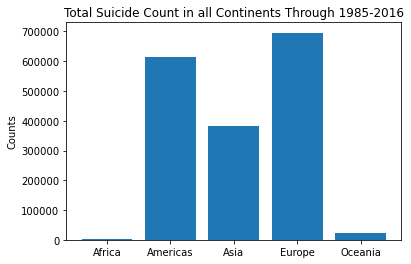

In [14]:
cont_list = []
count_list = []
for cont in np.unique(new_df['continent']):
    cont_list.append(cont)
    count_list.append(np.sum(new_df[new_df['continent']== cont].suicides_no))
plt.bar(cont_list, count_list)
plt.title('Total Suicide Count in all Continents Through 1985-2016')
plt.ylabel('Counts')
plt.show()

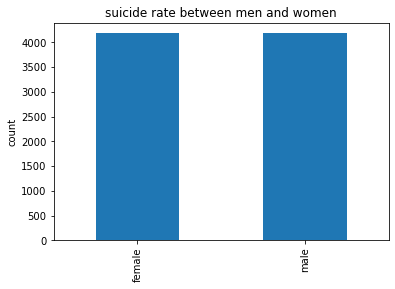

4182 male
4182 female


In [15]:
df['sex'].value_counts().plot(kind = 'bar')
plt.title('suicide rate between men and women')
plt.ylabel('count')
plt.show()
print(np.sum(df['sex'] == 'male'),'male')
print(np.sum(df['sex'] == 'female'),'female')


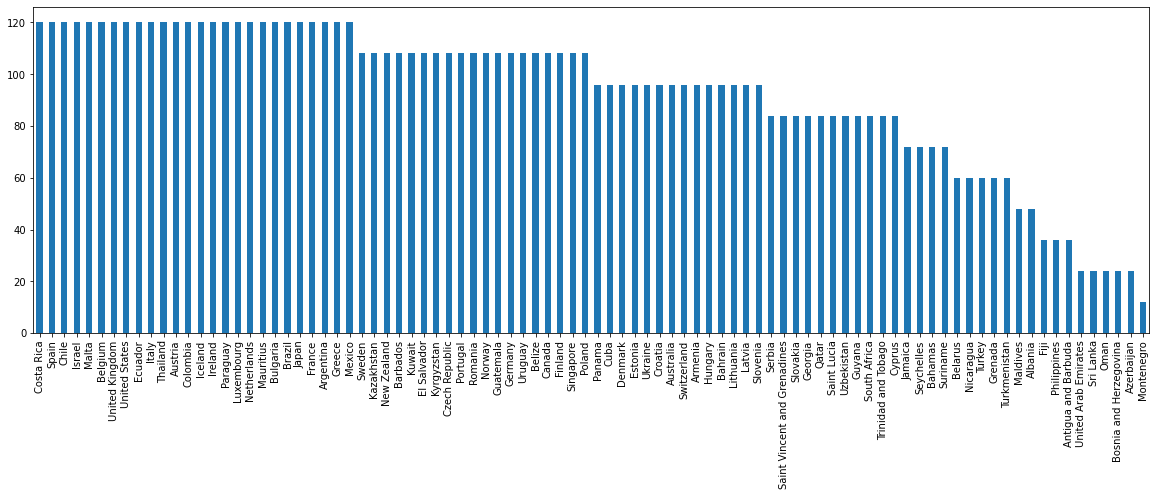

In [16]:
fig = plt.figure(figsize=(20,6))
df['country'].value_counts().plot(kind='bar')
plt.show()

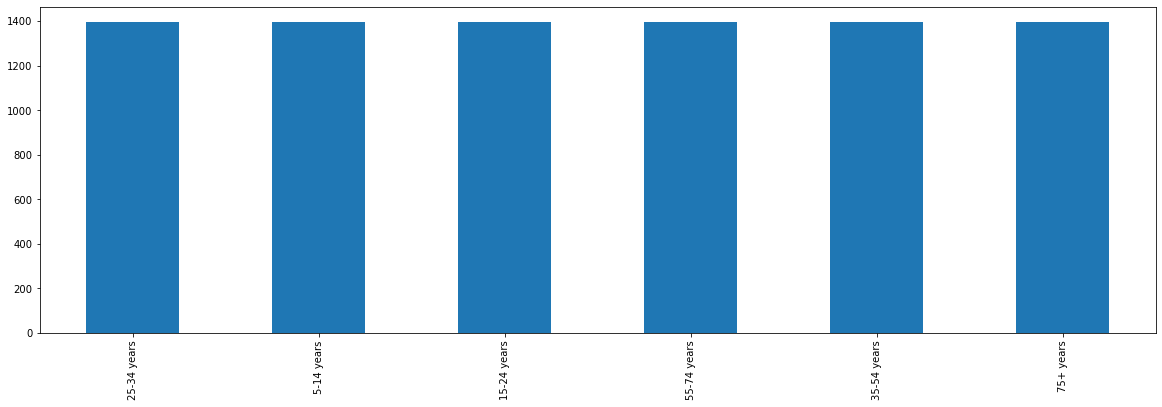

In [17]:
fig = plt.figure(figsize=(20,6))
df['age'].value_counts().plot(kind='bar')
plt.show()

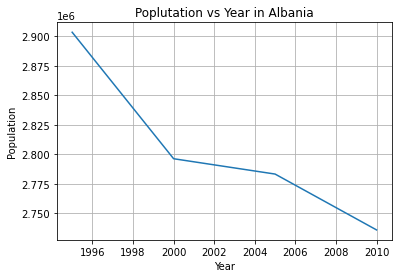

In [10]:
plot_population(df, 'Albania')

Number of data:  120


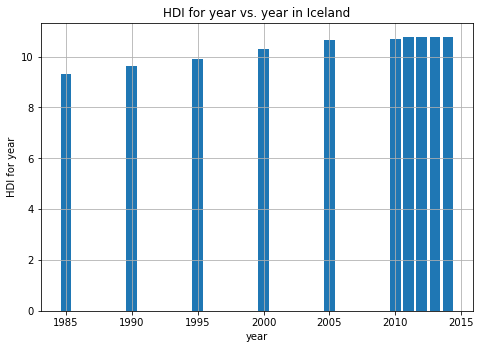

In [11]:
barplot(df, 'year', 'HDI for year', 'Iceland')

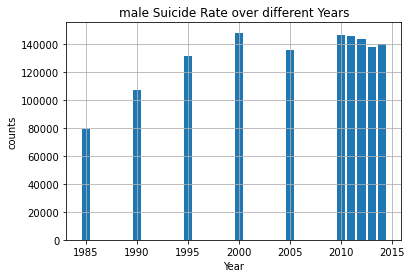

In [12]:
suicide_gender_year(df, 'male')